In [1]:
from MCForecastTools import MCSimulation
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame
import numpy as np

%matplotlib inline 

In [2]:
load_dotenv()

api_key = os.getenv("QUANDL_API_KEY")
api_skey = os.getenv("SECRET_API_KEY")

print(f"Alpaca Key type: {type(api_key)}")
print(f"Alpaca Secret Key type: {type(api_skey)}")



Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [3]:
api = REST(api_key,api_skey)


In [4]:
SPY = api.get_bars("SPY",TimeFrame.Day,"2018-06-08","2021-06-08", adjustment='raw',limit=1000).df
SPY.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-06-08 04:00:00+00:00,276.78,278.25,276.6600,278.19,72150269,238238,277.711297
2018-06-11 04:00:00+00:00,278.42,279.37,278.3100,278.56,58894807,211393,278.748137
2018-06-12 04:00:00+00:00,279.05,279.33,278.1900,278.92,72984124,211612,278.826095
2018-06-13 04:00:00+00:00,279.21,279.48,277.8000,278.03,79378117,275306,278.685416
2018-06-14 04:00:00+00:00,279.01,279.33,278.0599,278.73,77667620,233427,278.670576


In [5]:
AGG = api.get_bars("AGG",TimeFrame.Day,"2018-06-08","2021-06-08", adjustment='raw', limit=1000).df
AGG.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-06-08 04:00:00+00:00,105.75,105.90,105.740,105.75,3416767,12172,105.824857
2018-06-11 04:00:00+00:00,105.65,105.74,105.570,105.64,4330856,13973,105.635900
2018-06-12 04:00:00+00:00,105.56,105.69,105.560,105.67,3546472,10209,105.641868
2018-06-13 04:00:00+00:00,105.68,105.75,105.380,105.57,3627830,12403,105.601123
2018-06-14 04:00:00+00:00,105.75,105.86,105.691,105.84,4689627,16198,105.765441


In [6]:




ticker_data = pd.concat([AGG,SPY], axis=1, keys=["AGG", "SPY"])
ticker_data.head()




AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2018-06-08 04:00:00+00:00  105.75  105.90  105.740  105.75  3416767   
2018-06-11 04:00:00+00:00  105.65  105.74  105.570  105.64  4330856   
2018-06-12 04:00:00+00:00  105.56  105.69  105.560  105.67  3546472   
2018-06-13 04:00:00+00:00  105.68  105.75  105.380  105.57  3627830   
2018-06-14 04:00:00+00:00  105.75  105.86  105.691  105.84  4689627   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-06-08 04:00:00+00:00       12172  105.824857  276.78  278.25  276.6600   
2018-06-11 04:00:00+00:00       13973  105.635900  278.42  279.37  278.3100   
2018-06-12 04:00:00+00:00       10209  105.641868  279.05  279.33  278.1900   
2018-06-13 04:00:00+00:00       12403  105.601123  279.21  279.48  277.8000   
2018-06-14 04:00:00+00:00       16198  105.765441  279.01  279.33  278.0599   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-06-08 04:00:00+00:00  278.19  72150269      238238  277.711297  
2018-06-11 04:00:00+00:00  278.56  58894807      211393  278.748137  
2018-06-12 04:00:00+00:00  278.92  72984124      211612  278.826095  
2018-06-13 04:00:00+00:00  278.03  79378117      275306  278.685416  
2018-06-14 04:00:00+00:00  278.73  77667620      233427  278.670576

In [7]:
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_A_S = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)
MC_A_S.portfolio_data.head()


AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2018-06-08 04:00:00+00:00  105.75  105.90  105.740  105.75  3416767   
2018-06-11 04:00:00+00:00  105.65  105.74  105.570  105.64  4330856   
2018-06-12 04:00:00+00:00  105.56  105.69  105.560  105.67  3546472   
2018-06-13 04:00:00+00:00  105.68  105.75  105.380  105.57  3627830   
2018-06-14 04:00:00+00:00  105.75  105.86  105.691  105.84  4689627   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-08 04:00:00+00:00       12172  105.824857          NaN  276.78   
2018-06-11 04:00:00+00:00       13973  105.635900    -0.001040  278.42   
2018-06-12 04:00:00+00:00       10209  105.641868     0.000284  279.05   
2018-06-13 04:00:00+00:00       12403  105.601123    -0.000946  279.21   
2018-06-14 04:00:00+00:00       16198  105.765441     0.002558  279.01   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2018-06-08 04:00:00+00:00  278.25  276.6600  278.19  72150269      238238   
2018-06-11 04:00:00+00:00  279.37  278.3100  278.56  58894807      211393   
2018-06-12 04:00:00+00:00  279.33  278.1900  278.92  72984124      211612   
2018-06-13 04:00:00+00:00  279.48  277.8000  278.03  79378117      275306   
2018-06-14 04:00:00+00:00  279.33  278.0599  278.73  77667620      233427   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-08 04:00:00+00:00  277.711297          NaN  
2018-06-11 04:00:00+00:00  278.748137     0.001330  
2018-06-12 04:00:00+00:00  278.826095     0.001292  
2018-06-13 04:00:00+00:00  278.685416    -0.003191  
2018-06-14 04:00:00+00:00  278.670576     0.002518

In [8]:
MC_A_S.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\halos\API_Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994293,0.992753,1.000661,0.995948,1.001097,1.010457,0.995899,0.991080,0.987745,1.010216,...,0.998634,0.977980,1.003649,0.995488,0.998286,0.990807,0.983925,1.014180,0.998592,0.989513
2,0.991601,0.997276,1.005982,0.986131,0.985003,1.013190,0.991010,0.993652,0.994915,1.008949,...,1.007740,0.964307,0.998801,0.999582,1.001118,0.982709,0.992670,1.033452,0.988674,0.966225
3,0.988359,0.992817,0.999425,0.985393,0.986722,1.003909,0.988871,0.981045,0.996602,1.017954,...,1.020058,0.956526,0.998390,1.009626,1.018150,0.965977,0.997442,1.031961,0.989637,0.966854
4,1.005525,0.997011,1.002596,0.975461,0.984732,1.014072,0.986575,0.982359,1.000349,1.013027,...,1.014601,0.953832,1.000767,1.004466,1.005618,0.964852,0.996871,1.035240,0.993083,0.965397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.976404,1.136318,1.382495,1.049908,1.234220,1.275623,1.312533,1.154972,0.998040,1.010888,...,1.149118,0.850135,1.114288,1.106296,1.736303,1.090057,1.352053,1.105982,0.748056,1.525791
249,0.980377,1.135590,1.389809,1.047747,1.231500,1.282645,1.292689,1.158910,0.996608,1.015749,...,1.146059,0.853506,1.102344,1.104937,1.727151,1.100757,1.358582,1.106993,0.749401,1.524290
250,0.974758,1.129087,1.385740,1.036295,1.229618,1.285821,1.291094,1.148089,1.003533,1.016203,...,1.157235,0.858325,1.113008,1.097961,1.775288,1.101981,1.353074,1.114140,0.747672,1.513823
251,0.956023,1.132655,1.406517,1.038653,1.234894,1.285382,1.289712,1.139418,1.010565,1.028455,...,1.149319,0.872549,1.124138,1.105860,1.753409,1.115968,1.342310,1.116403,0.749627,1.504342


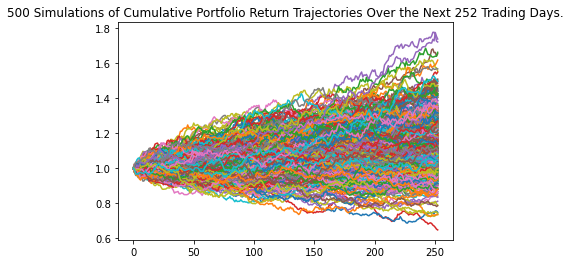

In [9]:
line_plot=MC_A_S.plot_simulation()

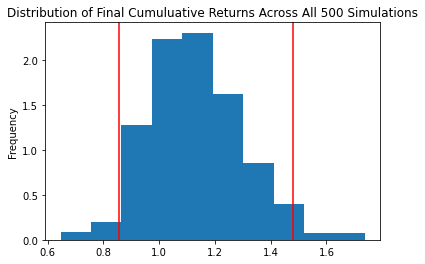

In [10]:
dis_plot = MC_A_S.plot_distribution()

In [11]:
MC_tbl = MC_A_S.summarize_cumulative_return()

print(MC_tbl)

count           500.000000
mean              1.129820
std               0.165997
min               0.646501
25%               1.010856
50%               1.108797
75%               1.243906
max               1.738096
95% CI Lower      0.855806
95% CI Upper      1.479784
Name: 252, dtype: float64


In [12]:
# this would calculate the expected portfolio return in dollars at the 95% lower and upper interval
initial_investment = 20000

MC_ci_lower = round(MC_tbl[8] * initial_investment,2)
MC_ci_higher = round(MC_tbl[9] * initial_investment,2)

print(MC_ci_lower, MC_ci_higher)

17116.11 29595.69


In [13]:
# this would calculate the expected portfolio return if the inital investment increased by 50%
MC_ci_lower_2 = round(MC_tbl[8] * ((initial_investment * .5) + initial_investment),2)
MC_ci_higher_2 = round(MC_tbl[9] * ((initial_investment * .5) + initial_investment),2)

print(MC_ci_lower_2, MC_ci_higher_2)

25674.17 44393.53


In [15]:
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${MC_ci_lower} and ${MC_ci_higher}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next year will end within in the range of $17116.11 and $29595.69.


In [16]:
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${MC_ci_lower_2} and ${MC_ci_higher_2}.")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next year will end within in the range of $25674.17 and $44393.53.
